In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,RocCurveDisplay
from sklearn.model_selection import train_test_split,cross_val_score
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


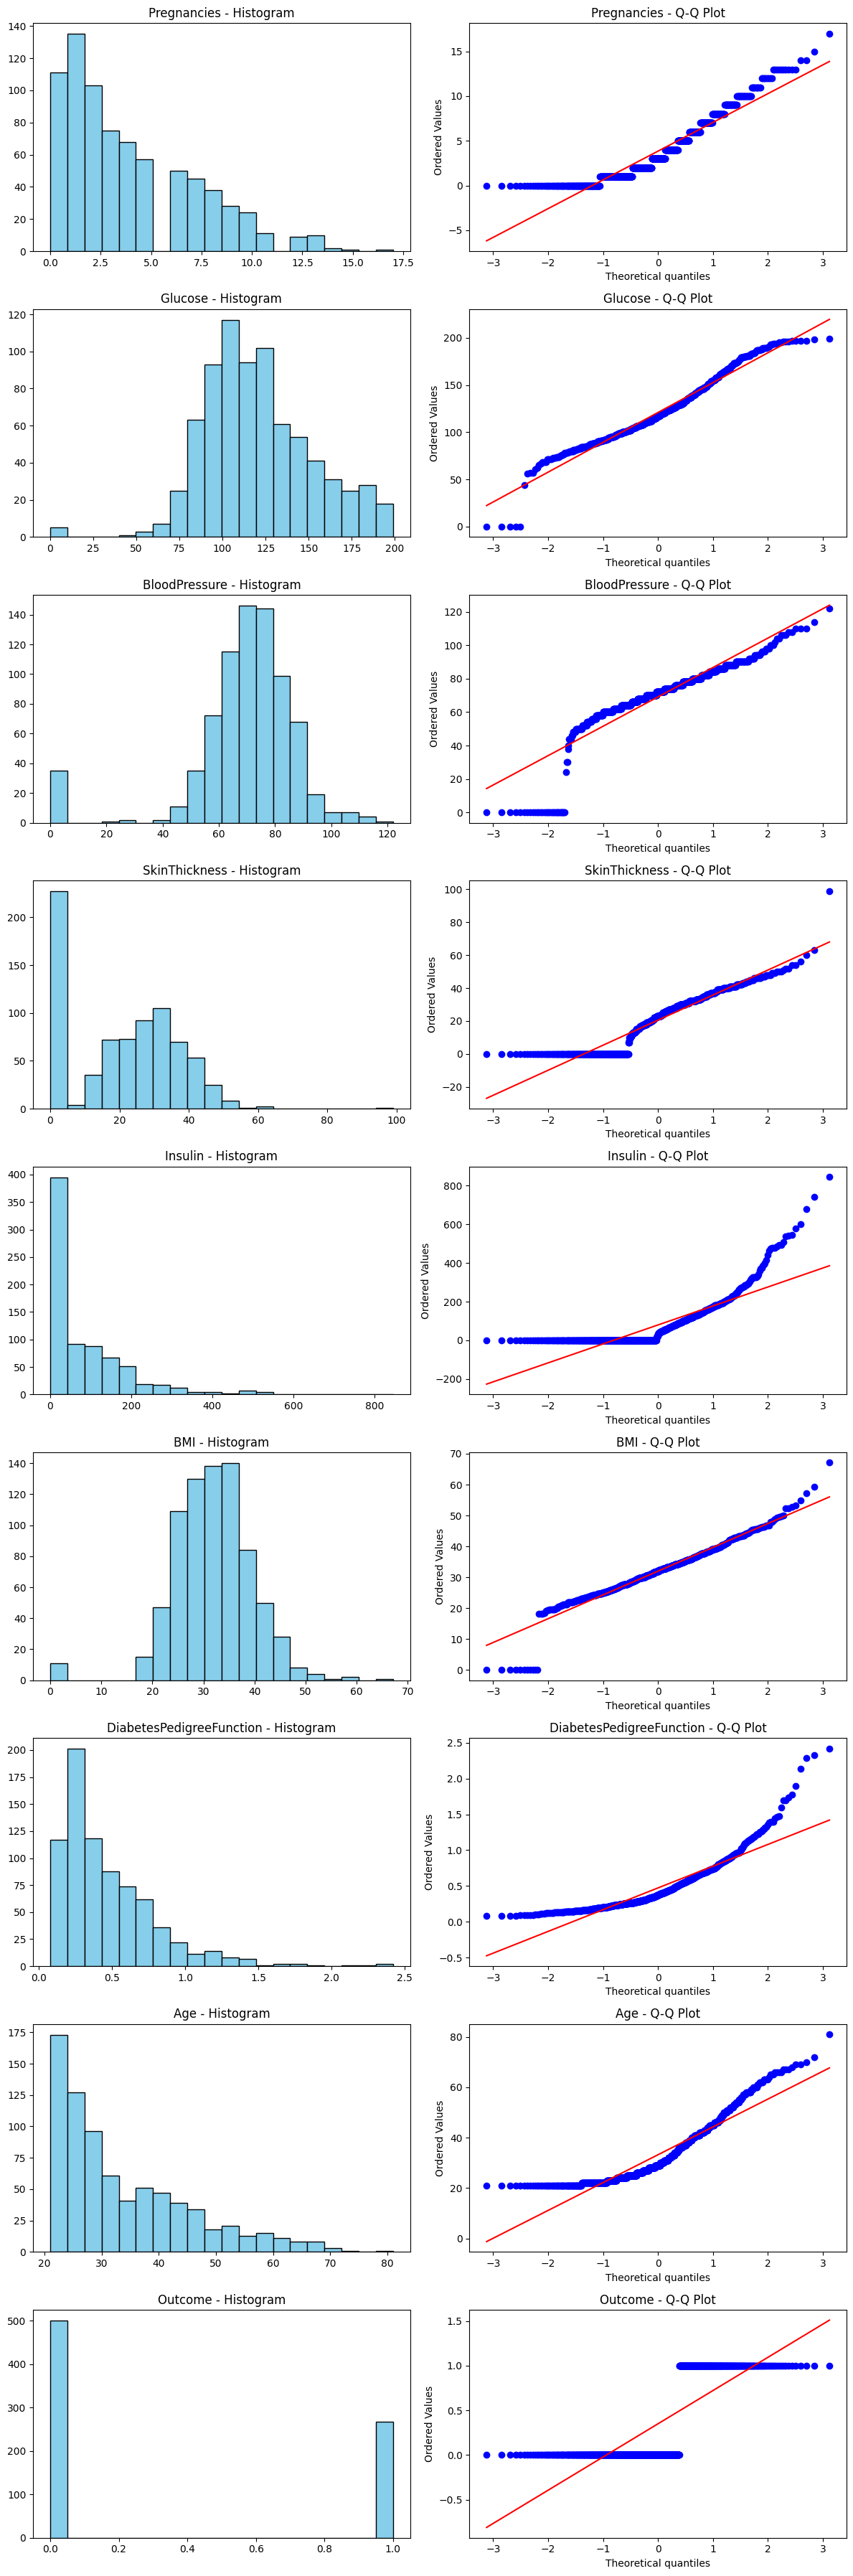

In [8]:
import matplotlib.pyplot as plt
from scipy import stats


num_features = len(df.columns)  # Özellik sayısı
fig, axs = plt.subplots(num_features, 2, figsize=(12, 4*num_features))

for i, feature in enumerate(df.columns):
    # Histogram
    axs[i, 0].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'{feature} - Histogram')
    
    # Q-Q Plot
    stats.probplot(df[feature], dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'{feature} - Q-Q Plot')

plt.tight_layout()
plt.show()


In [3]:
def outliers(df,variable):
    q1= df[variable].quantile(0.10)
    q3 = df[variable].quantile(0.90)
    iqr = q3 - q1
    lower_lim = q1 - 1.5*iqr
    upper_lim = q3 + 1.5*iqr
    return lower_lim,upper_lim

def check_outliers(df,variable):
    lower_lim,upper_lim = outliers(df,variable)
    if df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)].any(axis=None):
        return True
    else:
        return False
    
def replace_outliers(df,variable):
    lower_lim, upper_lim = outliers(df,variable)
    df[variable].clip(lower=lower_lim, upper=upper_lim,inplace=True)

In [9]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df["Outcome"].value_counts() / len(df) * 100

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

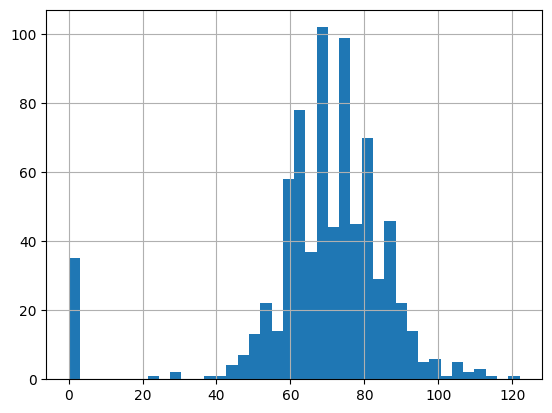

In [12]:
df["BloodPressure"].hist(bins=40)

<Axes: xlabel='BloodPressure'>

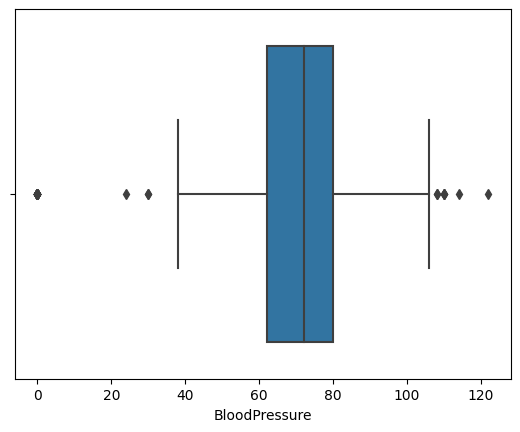

In [13]:
sns.boxplot(x=df["BloodPressure"])

In [14]:
X = df.drop("Outcome",axis=1)
df_columns = list(X.keys())
titles = [col for col in df_columns]

fig = make_subplots(rows=2, cols=4, subplot_titles=titles)

for i, col in enumerate(df_columns):
    row = i // 4 + 1
    col_idx =  i % 4 + 1
    fig.add_trace(go.Histogram(x=df[col], name=titles[i],nbinsx=50), row=row, col=col_idx)

fig.update_layout(height=700, width=1400, title_text="Multiple Subplots", template="plotly_dark")
fig.show()

In [15]:
df["Glucose"] =df["Glucose"].replace(0,np.nan)
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["Insulin"] = df["Insulin"].replace(0,np.nan)
df["BMI"] = df["BMI"].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
df_california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
imp= IterativeImputer(
    estimator=XGBRegressor(n_estimators=300,max_depth=7),
    max_iter=30,
    random_state=0
).set_output(transform="pandas")

df2=imp.fit_transform(df)

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



<Axes: ylabel='Density'>

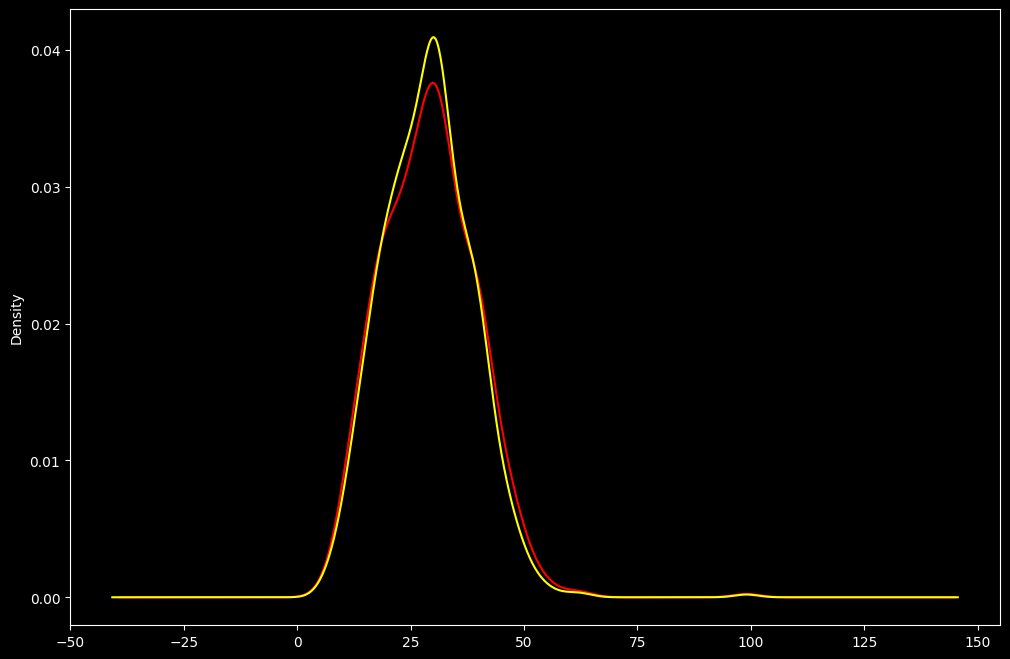

In [11]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

df["SkinThickness"].plot(kind="kde",ax=ax,color="red")
df2["SkinThickness"].plot(kind="kde",ax=ax,color="yellow")

In [12]:
def num_vs_target(df,num_cols,target):
    for col in num_cols:
        print(col)
        print(df.groupby(target)[col].mean())
        print()
        
num_vs_target(df2,list(X.keys()),"Outcome")

Pregnancies
Outcome
0.0    3.298000
1.0    4.865672
Name: Pregnancies, dtype: float64

Glucose
Outcome
0.0    110.667507
1.0    142.482976
Name: Glucose, dtype: float64

BloodPressure
Outcome
0.0    70.864411
1.0    75.371390
Name: BloodPressure, dtype: float64

SkinThickness
Outcome
0.0    26.991619
1.0    32.263711
Name: SkinThickness, dtype: float64

Insulin
Outcome
0.0    130.650220
1.0    203.962327
Name: Insulin, dtype: float64

BMI
Outcome
0.0    30.876142
1.0    35.372092
Name: BMI, dtype: float64

DiabetesPedigreeFunction
Outcome
0.0    0.429734
1.0    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

Age
Outcome
0.0    31.190000
1.0    37.067164
Name: Age, dtype: float64



In [13]:
X = df2.drop("Outcome",axis=1)
df_columns = list(X.keys())
titles = [col for col in df_columns]

fig = make_subplots(rows=2, cols=4, subplot_titles=titles)

for i, col in enumerate(df_columns):
    row = i // 4 + 1
    col_idx =  i % 4 + 1
    fig.add_trace(go.Histogram(x=df2[col], name=titles[i],nbinsx=50), row=row, col=col_idx)

fig.update_layout(height=700, width=1400, title_text="Multiple Subplots", template="plotly_dark")
fig.show()

In [14]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.769780,72.437159,28.831360,156.233091,32.445041,0.471876,33.240885,0.348958
std,3.369578,30.551133,12.204168,9.860445,103.592465,6.893122,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,5.855435,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,87.790667,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.112716,195.328655,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
list(X.keys())

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
for col in list(X.keys()):
    print(col,check_outliers(df2,col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction True
Age False


In [17]:
replace_outliers(df2,"SkinThickness")
replace_outliers(df2,"Insulin")
for col in list(X.keys()):
    print(col,check_outliers(df2,col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction True
Age False


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.769780,72.437159,28.804667,155.692374,32.445041,0.471876,33.240885,0.348958
std,3.369578,30.551133,12.204168,9.696634,100.685644,6.893122,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,5.855435,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,87.790667,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.112716,195.328655,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,78.500000,618.243263,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='SkinThickness'>

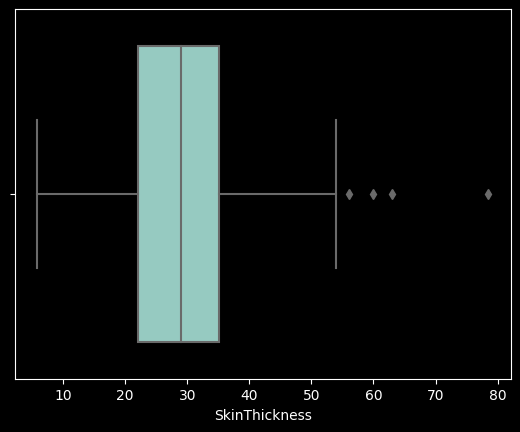

In [20]:
sns.boxplot(x=df2["SkinThickness"])

In [21]:
X = df2.drop("Outcome",axis=1)
df_columns = list(X.keys())
titles = [col for col in df_columns]

fig = make_subplots(rows=2, cols=4, subplot_titles=titles)

for i, col in enumerate(df_columns):
    row = i // 4 + 1
    col_idx =  i % 4 + 1
    fig.add_trace(go.Histogram(x=df2[col], name=titles[i],nbinsx=50), row=row, col=col_idx)

fig.update_layout(height=700, width=1400, title_text="Multiple Subplots", template="plotly_dark")
fig.show()

In [22]:
X = df2.drop("Outcome",axis=1)
y = df2["Outcome"]
rb = RobustScaler().set_output(transform="pandas")
X=rb.fit_transform(X)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.738095,0.000,0.457571,0.893217,0.148352,0.665359,1.235294
1,-0.4,-0.761905,-0.375,0.000000,-0.503854,-0.620879,-0.056209,0.117647
2,1.0,1.571429,-0.500,-0.735076,0.409470,-0.983516,0.783007,0.176471
3,-0.4,-0.666667,-0.375,-0.457571,-0.334765,-0.456044,-0.537255,-0.470588
4,-0.6,0.476190,-2.000,0.457571,0.353363,1.192308,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.380952,0.250,1.448975,0.464952,0.071429,-0.526797,2.000000
764,-0.2,0.119048,-0.125,-0.152524,0.165538,0.500000,-0.084967,-0.117647
765,0.4,0.095238,0.000,-0.457571,-0.167383,-0.664835,-0.333333,0.058824
766,-0.4,0.214286,-0.750,-0.343494,-0.199081,-0.236264,-0.061438,1.058824


In [23]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.169010,0.113566,0.027322,-0.014896,0.238914,0.021433,0.259807,0.249464
std,0.673916,0.727408,0.762760,0.739483,0.936280,0.757486,0.866219,0.691778
min,-0.600000,-1.738095,-3.000000,-1.765047,-1.078689,-1.543956,-0.769935,-0.470588
25%,-0.400000,-0.428571,-0.500000,-0.533833,-0.392506,-0.521978,-0.336601,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.571429,0.500000,0.466167,0.607494,0.478022,0.663399,0.705882
max,2.800000,1.952381,3.125000,3.774962,4.540193,3.829670,5.352941,3.058824


In [24]:
lg = LogisticRegression()
cross_val_score(lg,X,y,cv=10,n_jobs=-1,scoring="recall").mean()

0.5633903133903134

In [25]:
cross_val_score(lg,X,y,cv=10,n_jobs=-1,scoring="accuracy").mean()

0.7695488721804512

In [26]:
cross_val_score(lg,X,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8365327635327635

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="recall").mean()

0.607977207977208

In [28]:
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="accuracy").mean()

0.7616370471633629

In [29]:
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8405427350427349

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify=y)

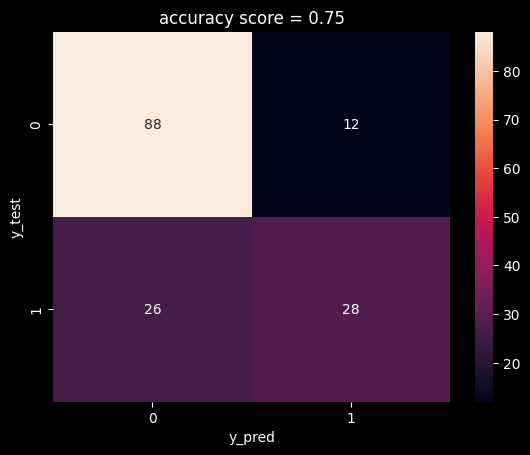

In [31]:
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       100
         1.0       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [33]:
y_prob = lg.predict_proba(X_test)[:, 1] 
roc_auc_score(y_test, y_prob)

0.8383333333333334

In [34]:
y_prob = lg.predict_proba(X_test)[:, 0] 
1-roc_auc_score(y_test, y_prob)

0.8383333333333334

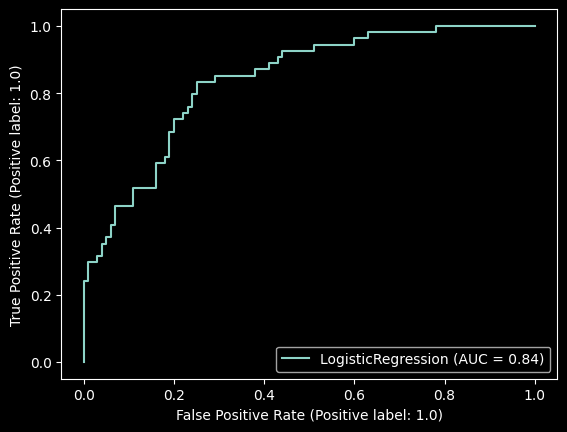

In [35]:
RocCurveDisplay.from_estimator(lg, X_test, y_test)

In [38]:
from sklearn.model_selection import cross_validate
cv_results= cross_validate(lg,X,y,cv=10,scoring=["accuracy","precision","recall","f1","roc_auc"])
cv_results

{'fit_time': array([0.00399923, 0.00400805, 0.00300312, 0.00200009, 0.00300002,
        0.00299764, 0.00300646, 0.00300932, 0.00298309, 0.00300574]),
 'score_time': array([0.00904036, 0.00799084, 0.0070045 , 0.0079906 , 0.00700998,
        0.00699258, 0.00799346, 0.00700569, 0.00700402, 0.00699162]),
 'test_accuracy': array([0.75324675, 0.76623377, 0.79220779, 0.7012987 , 0.76623377,
        0.79220779, 0.76623377, 0.80519481, 0.72368421, 0.82894737]),
 'test_precision': array([0.66666667, 0.73684211, 0.73913043, 0.58333333, 0.76470588,
        0.76190476, 0.71428571, 0.77272727, 0.61904762, 0.84210526]),
 'test_recall': array([0.59259259, 0.51851852, 0.62962963, 0.51851852, 0.48148148,
        0.59259259, 0.55555556, 0.62962963, 0.5       , 0.61538462]),
 'test_f1': array([0.62745098, 0.60869565, 0.68      , 0.54901961, 0.59090909,
        0.66666667, 0.625     , 0.69387755, 0.55319149, 0.71111111]),
 'test_roc_auc': array([0.80666667, 0.81777778, 0.85111111, 0.75259259, 0.84740741,
 

In [40]:
cv_results["test_accuracy"].mean()

0.7695488721804512

In [41]:
cv_results["test_recall"].mean()

0.5633903133903134